In [87]:
%run ml_tools.py
import matplotlib.pyplot as plt


## Mean accuracy: 0.80 ± 0.01
## Mean ROC AUC : 0.80 ± 0.02


,fit_time,score_time,train_accuracy,test_accuracy,train_roc_auc,test_roc_auc,test_fpr,test_tpr,best_parameters
fold_number,,,,,,,,,
0,0.092159,0.0469429,0.797739,0.799816,0.79922,0.788132,"[0.0, 0.001388888888888889, 0.0020833333333333...","[0.0, 0.036, 0.03625, 0.0365, 0.037, 0.039, 0....",NaN
1,0.0769727,0.0439239,0.795119,0.795404,0.798381,0.806598,"[0.0, 0.002777777777777778, 0.0034722222222222...","[0.0, 0.03825, 0.03825, 0.0385, 0.03925, 0.039...",NaN
2,0.0840878,0.041517,0.793511,0.79761,0.79502,0.799848,"[0.0, 0.004166666666666667, 0.0041666666666666...","[0.0, 0.04, 0.04075, 0.042, 0.04475, 0.04525, ...",NaN
3,0.0714171,0.0422888,0.796498,0.800735,0.796747,0.793025,"[0.0, 0.004166666666666667, 0.0041666666666666...","[0.0, 0.04775, 0.04875, 0.049, 0.0495, 0.0505,...",NaN
4,0.068188,0.042258,0.79875,0.807169,0.798306,0.80942,"[0.0, 0.003472222222222222, 0.0034722222222222...","[0.0, 0.03925, 0.04, 0.0405, 0.041, 0.0415, 0....",NaN


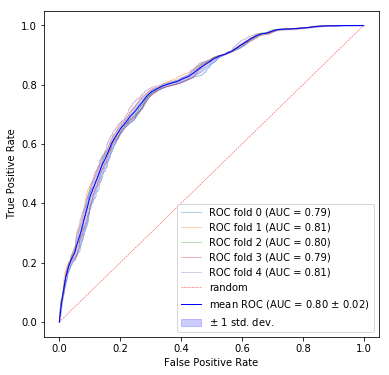

In [88]:
X, y = load_dataset("../../data")

from sklearn.model_selection import StratifiedShuffleSplit
cv_strategy = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)

from sklearn.naive_bayes import GaussianNB

model_GaussianNB = GaussianNB()

fig, ax = plt.subplots(1, 1, figsize = (6, 6))
metrics = run_model(model_GaussianNB, X, y, cv_strategy, plot_roc = True, ax = ax)
metrics

In [ ]:
%run Selene_Job.py

In [40]:
job_random_forest_gs = Selene_Job("random_forest_gs")

➞ mkdir ssh_remote_jobs/job_random_forest_gs


In [45]:
%%writefile {job_random_forest_gs.local_job_directory_path}/script.py
print("Setup environment...", end = "")
import sys
sys.path.append("../../")

from ml_tools import *
print(" done!")

print("Run model...")
from sklearn.model_selection import StratifiedShuffleSplit
cv_strategy = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)

from sklearn.model_selection import GridSearchCV
inner_cv_strategy = StratifiedShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 1)

from sklearn.ensemble import RandomForestClassifier
parameters_grid = [
    {'n_estimators': [10, 100, 1000], 'max_depth': [5, 20, 50]}
]

model_GS_RandomForestClassifier = GridSearchCV(RandomForestClassifier(), parameters_grid, cv = inner_cv_strategy, scoring = 'roc_auc', refit = True)
X, y = load_dataset("../../../../data")
metrics = run_model(model_GS_RandomForestClassifier, X, y, cv_strategy, grid_search = True, print_grid_search_metrics = True, print_fold_metrics = True)

print("Save metrics...", end = "")
metrics.to_csv("metrics.csv")
print(" done!")

Overwriting ssh_remote_jobs/job_random_forest_gs/script.py


In [46]:
job_random_forest_gs.run()

➞ scp ssh_remote_jobs/job_random_forest_gs to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
script.py                                     100% 1009   111.0KB/s   00:00    
➞ Logged in /home/guilminp on selene.cbio.private
➞ Load ~/.bash_profile
Hi Pierre!
➞ Work on impact-annotator_env python virtualenv
➞ Launch job in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_random_forest_gs
Job <28054467> is submitted to default queue <sol>.


In [50]:
job_random_forest_gs.get_results()

✅ <span style='color:green'>Job \< random_forest_gs \> finished !</span><br>

➞ scp guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_random_forest_gs documents to ssh_remote_jobs/job_random_forest_gs
metrics.csv                                   100% 1441    70.6KB/s   00:00    
job_output.txt                                100% 6640   369.8KB/s   00:00    
➞ Load metrics.csv in pandas dataframe


,fold_number,fit_time,score_time,train_accuracy,test_accuracy,train_roc_auc,test_roc_auc,test_fpr,test_tpr,best_parameters
0,0,245.967178,5.125430,1.000000,0.887684,1.000000,0.894227,[0. 0. 0. ... 0.945138...,[0. 0.00575 0.006 ... 1. 1. 1...,"{'max_depth': 50, 'n_estimators': 1000}"
1,1,234.818180,3.475672,0.929041,0.880331,0.965213,0.902384,[0. 0. 0. ... 0.965972...,[0.00e+00 2.50e-04 4.35e-02 ... 1.00e+00 1.00e...,"{'max_depth': 20, 'n_estimators': 1000}"
2,2,226.128261,3.532764,0.928443,0.879779,0.966058,0.891810,[0. 0. 0. ... 0.977083...,[0.0e+00 2.5e-04 3.5e-02 ... 1.0e+00 1.0e+00 1...,"{'max_depth': 20, 'n_estimators': 1000}"
3,3,294.917571,7.385947,1.000000,0.884375,1.000000,0.892617,[0. 0. 0. ... 0.916666...,[0. 0.00875 0.009 ... 0.99975 0.99975 1...,"{'max_depth': 50, 'n_estimators': 1000}"
4,4,289.754549,5.210357,1.000000,0.885662,1.000000,0.896756,[0. 0. 0. ... 0.947222...,[0. 0.00625 0.0065 ... 1. 1. 1...,"{'max_depth': 50, 'n_estimators': 1000}"


In [116]:
job = Selene_Job("Gaussian_NB_test")

➞ mkdir ssh_remote_jobs/job_Gaussian_NB_test


In [117]:
%%writefile {job.local_job_directory_path}/script.py
print("Setup environment...", end = "")
import sys
sys.path.append("../../")

from ml_tools import *
print(" done!")

print("Run model...")
from sklearn.model_selection import StratifiedShuffleSplit
cv_strategy = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)

from sklearn.naive_bayes import GaussianNB

model_GaussianNB = GaussianNB()
X, y = load_dataset("../../../../data")
metrics = run_model(model_GaussianNB, X, y, cv_strategy, print_fold_metrics = True, in_cluster = True)

print("Save metrics...", end = "")
metrics.to_pickle("metrics.pkl")
print(" done!")

Writing ssh_remote_jobs/job_Gaussian_NB_test/script.py


In [ ]:
job.run()

In [ ]:
job.get_results()